# Chapter Five - Data Visualization and Profiling

## Data Quality

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../../optimus")

In [3]:
from optimus import Optimus 
op = Optimus("pandas")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LuisA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
df = op.load.file("foo.csv")

In [5]:
df.cols.quality()

{'name': {'match': 4,
  'missing': 0,
  'mismatch': 0,
  'inferred_type': {'data_type': 'str', 'categorical': True}},
 'job': {'match': 4,
  'missing': 0,
  'mismatch': 0,
  'inferred_type': {'data_type': 'str', 'categorical': True}},
 'id': {'match': 4,
  'missing': 0,
  'mismatch': 0,
  'inferred_type': {'data_type': 'int', 'categorical': True}}}

In [6]:
df = df.cols.set_data_type("salary", "int") 
df

name 1 (object),job 2 (object),id 3 (int64)
optimus,Leader,1
optimus,Espionage,2
bumblebee,1,3
bumblebee,3,40


In [7]:
df = df.cols.set_data_type({"salary": "int", "age": "str"})  

In [8]:
df = op.create.dataframe({"numbers": [1, 2, None, 4]})
df.display()
df.mask.missing("numbers")

numbers 1 (float64)
1.0
2.0
nan
4.0


numbers 1 (bool)
False
False
True
False


In [9]:
df = op.create.dataframe({"numbers": [1, 2, "Hello", 4, "World"]}) 
df.mask.match("numbers", data_type="int")

numbers 1 (bool)
True
True
False
True
False


In [10]:
df.rows.select(df.mask.match("numbers", data_type="int"))

numbers 1 (object)
1
2
4


In [11]:
df.rows.drop(df.mask.match("numbers", "int"))

numbers 1 (object)
Hello
World


In [12]:
df.cols.set("numbers", value=0, where=df.mask.mismatch("numbers", "int"))

numbers 1 (object)
1
2
0
4
0


In [13]:
df.cols.infer_types("numbers")
df.mask.mismatch("numbers")

numbers 1 (bool)
False
False
True
False
True


In [14]:
df.mask.mismatch("numbers", df["numbers"].profile.data_types())

numbers 1 (bool)
False
False
True
False
True


In [15]:
df.cols.set("numbers", value=0, where=df.mask.mismatch("numbers")) 

numbers 1 (object)
1
2
0
4
0


## Exploratory Data Analysis

In [16]:
from optimus import Optimus  
op = Optimus("pandas") 
df = op.load.file("store.csv")
df.display(10, ["id", "name", "code", "price"]) 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LuisA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


id 1 (int64),name 2 (object),code 3 (object),price 4 (float64)
1,pants,L15,173.47
2,shoes,SH,69.99
3,shirt,RG30,30.0
4,pants,J10,34.99
5,pants,JG15,132.99
6,shoes,B,57.99
7,pants,JG20,179.99
8,pants,L20,95.0
9,shirt,FT50,50.0
10,pants,JG15,169.99


In [17]:
df.cols.min("id") 

1

In [18]:
df.cols.max("id") 

504

In [19]:
df.cols.mode("price")

50.0

In [20]:
df.cols.median("price") 

104.99

In [21]:
df.cols.iqr("price") 

130.01

In [22]:
df.cols.mean("price")

121.30525793650794

In [23]:
df.cols.std("price") 

93.16652086384731

In [24]:
df.cols.var("price") 

8680.000609873696

In [25]:
df.cols.skew("price")

1.0015117495305208

In [26]:
df.cols.kurtosis("price") 

0.45556375186033016

In [27]:
df.cols.count_zeros("discount")

0

In [28]:
df.cols.count_nulls("discount") 

0

In [30]:
df.cols.count_missings("discount") 

0

In [31]:
df.cols.count_uniques("price") 

192

## Data Profiling

In [32]:
df.cols.hist("price",5) 

{'hist': {'price': [{'lower': 5.0, 'upper': 103.3675, 'count': 250},
   {'lower': 103.3675, 'upper': 201.735, 'count': 179},
   {'lower': 201.735, 'upper': 300.1025, 'count': 39},
   {'lower': 300.1025, 'upper': 398.47, 'count': 36}]}}

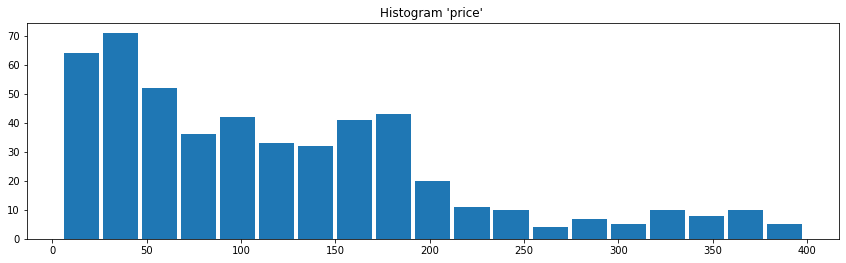

In [33]:
df.plot.hist("price",20)

In [34]:
df.cols.frequency("code", 5) 

{'frequency': {'code': {'values': [{'value': 'JG15', 'count': 60},
    {'value': 'JG10', 'count': 43},
    {'value': 'SK', 'count': 37},
    {'value': 'L15', 'count': 33},
    {'value': 'J15', 'count': 32}]}}}

In [35]:
df.cols.frequency("code", 5, tidy=True)

{'code': {'values': [{'value': 'JG15', 'count': 60},
   {'value': 'JG10', 'count': 43},
   {'value': 'SK', 'count': 37},
   {'value': 'L15', 'count': 33},
   {'value': 'J15', 'count': 32}]}}

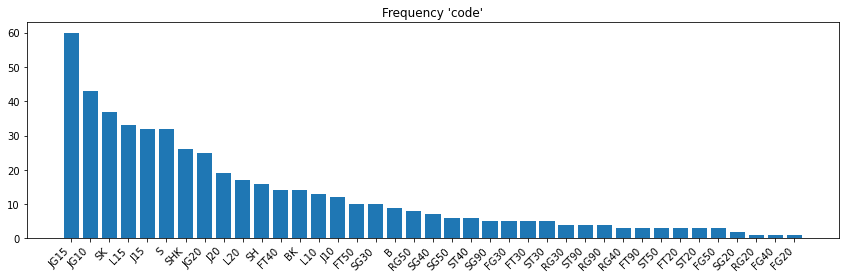

In [36]:
df.plot.frequency("code", 40) 

In [37]:
df.cols.boxplot("price")

{'price': {'mean': 121.30525793650794,
  'median': 104.99,
  'q1': 44.99,
  'q3': 175.0,
  'whisker_low': -150.02499999999998,
  'whisker_high': 370.015,
  'fliers': [374.99],
  'label': 'price'}}

In [38]:
df.plot.box("age") 

ValueError: 'missing_columns' must be 'id', 'name', 'code', 'price' or 'discount', received '['age']'.

In [39]:
df = op.create.dataframe(A=[18,21,62,44], B=[45,42,25,21]) 
df.cols.crosstab("A", "B") 

{21: {18: 0, 21: 0, 44: 1, 62: 0},
 25: {18: 0, 21: 0, 44: 0, 62: 1},
 42: {18: 0, 21: 1, 44: 0, 62: 0},
 45: {18: 1, 21: 0, 44: 0, 62: 0}}

In [40]:
df.cols.crosstab("A", "B", output="dataframe") 

A 1 (int64),21 2 (int64),25 3 (int64),42 4 (int64),45 5 (int64)
18,0,0,0,1
21,0,0,1,0
44,1,0,0,0
62,0,1,0,0


In [41]:
df = op.create.dataframe(A=[1,2,3,4], B=[4,5,0,7], C=[-1,-2,-5,-6]) 
df.cols.correlation(["A", "B"]) 

0.17541160386140586

In [42]:
df.cols.correlation("*") 

{'A': {'A': 1.0, 'B': 0.17541160386140586, 'C': -0.9761870601839528},
 'B': {'A': 0.17541160386140586, 'B': 1.0, 'C': 0.0},
 'C': {'A': -0.9761870601839528, 'B': 0.0, 'C': 1.0}}

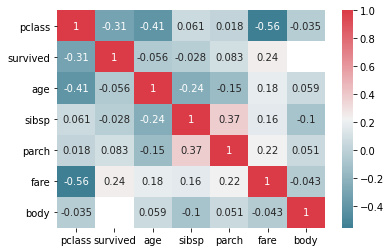

In [43]:
df = op.load.file("titanic3.xls") 
df.plot.correlation("*")

In [44]:
df = op.load.file("store.csv")
df.cols.heatmap("price", "id", 30, 30) 

{'x': {'name': 'price',
  'values': [[0.0,
    2.0,
    1.0,
    1.0,
    2.0,
    0.0,
    2.0,
    1.0,
    0.0,
    1.0,
    0.0,
    1.0,
    2.0,
    2.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0],
   [1.0,
    0.0,
    2.0,
    2.0,
    0.0,
    2.0,
    0.0,
    2.0,
    0.0,
    2.0,
    1.0,
    1.0,
    1.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.0,
    1.0,
    0.0,
    0.0],
   [1.0,
    1.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    2.0,
    2.0,
    1.0,
    0.0,
    0.0,
    4.0,
    1.0,
    2.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.0],
   [2.0,
    4.0,
    0.0,
    2.0,
    0.0,
    2.0,
    2.0,
    1.0,
    0.0,
    2.0,
    1.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,


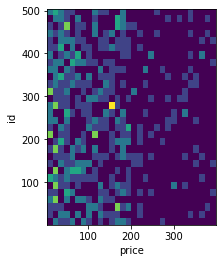

In [45]:
df.plot.heatmap("price", "id", 30, 30) 

In [46]:
df.profile(bins=5)

{'columns': {'id': {'stats': {'match': 504,
    'missing': 0,
    'mismatch': 0,
    'inferred_type': {'data_type': 'int', 'categorical': True},
    'frequency': [{'value': 1, 'count': 1},
     {'value': 332, 'count': 1},
     {'value': 345, 'count': 1},
     {'value': 344, 'count': 1},
     {'value': 343, 'count': 1}],
    'count_uniques': 504},
   'data_type': 'int64'},
  'name': {'stats': {'match': 504,
    'missing': 0,
    'mismatch': 0,
    'inferred_type': {'data_type': 'str', 'categorical': True},
    'frequency': [{'value': 'pants', 'count': 254},
     {'value': 'shoes', 'count': 134},
     {'value': 'shirt', 'count': 116}],
    'count_uniques': 3},
   'data_type': 'object'},
  'code': {'stats': {'match': 504,
    'missing': 0,
    'mismatch': 0,
    'inferred_type': {'data_type': 'str', 'categorical': True},
    'frequency': [{'value': 'JG15', 'count': 60},
     {'value': 'JG10', 'count': 43},
     {'value': 'SK', 'count': 37},
     {'value': 'L15', 'count': 33},
     {'value

In [47]:
df.profile.summary()

{'cols_count': 5,
 'rows_count': 504,
 'data_types_list': ['float64', 'int64', 'object'],
 'total_count_data_types': 3,
 'missing_count': 0,
 'p_missing': 0.0}

In [48]:
df.profile.columns()

[{'stats': {'match': 504,
   'missing': 0,
   'mismatch': 0,
   'inferred_type': {'data_type': 'int', 'categorical': True},
   'frequency': [{'value': 1, 'count': 1},
    {'value': 332, 'count': 1},
    {'value': 345, 'count': 1},
    {'value': 344, 'count': 1},
    {'value': 343, 'count': 1}],
   'count_uniques': 504},
  'data_type': 'int64'},
 {'stats': {'match': 504,
   'missing': 0,
   'mismatch': 0,
   'inferred_type': {'data_type': 'str', 'categorical': True},
   'frequency': [{'value': 'pants', 'count': 254},
    {'value': 'shoes', 'count': 134},
    {'value': 'shirt', 'count': 116}],
   'count_uniques': 3},
  'data_type': 'object'},
 {'stats': {'match': 504,
   'missing': 0,
   'mismatch': 0,
   'inferred_type': {'data_type': 'str', 'categorical': True},
   'frequency': [{'value': 'JG15', 'count': 60},
    {'value': 'JG10', 'count': 43},
    {'value': 'SK', 'count': 37},
    {'value': 'L15', 'count': 33},
    {'value': 'J15', 'count': 32}],
   'count_uniques': 39},
  'data_type

In [49]:
from optimus.helpers.constants import Actions
Actions.list()

['inferred_type',
 'match',
 'lower',
 'upper',
 'proper',
 'pad',
 'trim',
 'reverse',
 'remove',
 'left',
 'right',
 'mid',
 'replace',
 'fill_na',
 'cast',
 'is_na',
 'z_score',
 'nest',
 'unnest',
 'set',
 'string_to_index',
 'date_format',
 'format_date',
 'index_to_string',
 'min_max_scaler',
 'max_abs_scaler',
 'standard_scaler',
 'apply_cols',
 'impute',
 'extract',
 'abs',
 'math',
 'variance',
 'slice',
 'clip',
 'drop',
 'keep',
 'cut',
 'to_float',
 'to_integer',
 'to_bool',
 'to_boolean',
 'to_string',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'weekday',
 'append',
 'copy',
 'rename',
 'unique',
 'infer',
 'word_tokenize',
 'length',
 'get',
 'item',
 'domain',
 'top_domain',
 'sub_domain',
 'url_scheme',
 'url_path',
 'url_file',
 'url_query',
 'url_fragment',
 'host',
 'port',
 'email_domain',
 'email_user',
 'fingerprint',
 'ngram_fingerprint',
 'ngrams',
 'levenshtein',
 'soundex',
 'metaphone',
 'double_metaphone',
 'match_rating_codex',
 'nysiis',
 '